In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
d = mnist.data
l = mnist.target

In [4]:
df = pd.DataFrame(d)
df['label'] = l

df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


Before applying the t-SNE algorithm on the dataset we must standardize the data. As we know that the t-SNE algorithm is a complex algorithm which utilizes some complex non-linear methods.

In [5]:
standardized_data = StandardScaler().fit_transform(df)
standardized_data

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.18945965],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.54053973],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.15654023],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.15654023],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.18945965],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.53545952]], shape=(70000, 785))

Now let's reduce the 784 columns data to 2 dimensions so that we can create a scatter plot to visualize the same.

In [6]:
data_1000 = standardized_data[0:1000, :]
labels_1000 = l[0:1000]

In [7]:
model = TSNE(n_components=2, random_state=0)

In [8]:
tsne_data = model.fit_transform(data_1000)

tsne_data

array([[ 24.877949 ,  21.954275 ],
       [ -2.2728832,  39.593235 ],
       [ 16.746698 , -37.430565 ],
       ...,
       [  4.715022 ,  39.95817  ],
       [  4.392584 ,  12.678276 ],
       [-22.900118 ,  32.461937 ]], shape=(1000, 2), dtype=float32)

In [9]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T

tsne_data

array([[24.877948760986328, 21.954275131225586, '5'],
       [-2.272883176803589, 39.59323501586914, '0'],
       [16.7466983795166, -37.430564880371094, '4'],
       ...,
       [4.715022087097168, 39.95817184448242, '0'],
       [4.392583847045898, 12.678276062011719, '3'],
       [-22.900117874145508, 32.461936950683594, '6']],
      shape=(1000, 3), dtype=object)

In [10]:
tsne_df = pd.DataFrame(
    data=tsne_data,
    columns=("Dim_1", "Dim_2", "label")
)

tsne_df

,Dim_1,Dim_2,label
0,24.877949,21.954275,5
1,-2.272883,39.593235,0
2,16.746698,-37.430565,4
3,-14.394534,-12.412892,1
4,24.984596,-24.851395,9
...,...,...,...
995,-5.623408,-35.564709,7
996,-10.729664,18.975626,6
997,4.715022,39.958172,0
998,4.392584,12.678276,3


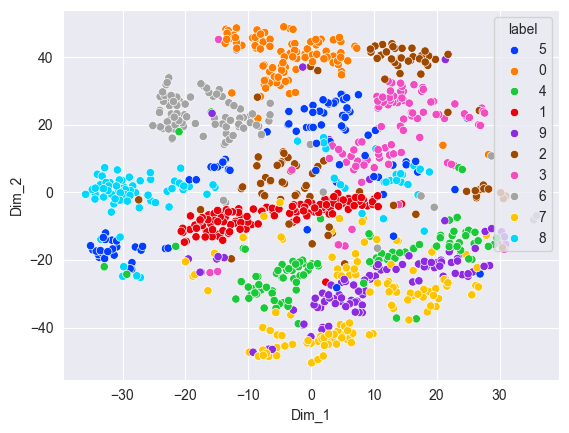

In [11]:
sn.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue='label', palette='bright')
plt.show()

The scatter plot above shows how t-SNE has mapped the MNIST dataset into a 2D space. The points are grouped by digit and we can see that similar digits (like 1s or 7s) are clustered together making it easier to identify patterns and relationships in the data.